In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import date

In [3]:
import numpy as np

In [4]:
import app_functions as af
import plots as pl

import pandas as pd
import plotly.express as px

2023-06-19 11:04:17.721 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-06-19 11:04:17.737 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-06-19 11:04:17.741 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-06-19 11:04:17.746 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-06-19 11:04:17.751 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-06-19 11:04:17.756 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-06-19 11:04:18.058 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-06-19 11:04:18.062 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-06-

In [5]:
data_dir_fp = r'Z:\Interés Departamental\Model Portfolio\Hugo\Ranking DIP European Equities\copia 12-04-2023\data\vertical_dowload_files'
prices_csv_filepath = r'Z:\Interés Departamental\Model Portfolio\Hugo\Ranking DIP European Equities\copia 12-04-2023\data\vertical_dowload_files\PriceClose.csv'
mask_fp = r'Z:\Interés Departamental\Model Portfolio\Hugo\Ranking DIP European Equities\copia 12-04-2023\data\PriceClose_vertical\monthly_constituents_filter.csv'

prices_df = af.read_and_sort_data(prices_csv_filepath)
mask = af.read_and_sort_data(mask_fp)
data_dict = af.filter_data(data_dir_fp,0.8,0.8,600,mask)[0]

2023-06-19 11:04:20.053 
  command:

    streamlit run c:\Users\hugo.perezdealbeniz\miniforge3\envs\ranking_dev\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2023-06-19 11:04:20.056 No runtime found, using MemoryCacheStorageManager
2023-06-19 11:04:21.804 No runtime found, using MemoryCacheStorageManager


Filtering:  CompanyMarketCapitalization.csv


2023-06-19 11:04:22.799 No runtime found, using MemoryCacheStorageManager


Filtering:  EV.csv
Filtering:  EVTOEBIT.csv
Filtering:  EVTOEBITDA.csv
Filtering:  EVTOOperatingCashFlow.csv
Filtering:  EVToSales.csv
Filtering:  HistPEG.csv
Filtering:  NetDebtToEBITDA.csv
Filtering:  NetDebtToEV.csv
Filtering:  PE.csv
Filtering:  PriceClose.csv
Filtering:  PriceToBVPerShare.csv
Filtering:  PriceToCFPerShare.csv
Filtering:  PriceToSalesPerShare.csv
Filtering:  PriceToTangBVPerShare.csv
Filtering:  TotalDebtToEBITDA.csv
Filtering:  TotalDebtToEV.csv


In [6]:
pe_df = data_dict['PE']
raw_pe = af.read_and_sort_data(data_dir_fp+'/PE.csv')

In [7]:
n_quantiles = 10

In [8]:
pe_masked = af.apply_mask(pe_df, mask)
pe_ranked = af.rank_data(pe_masked,n_quantiles,'high')
pe_rets = af.get_returns(pe_ranked,prices_df,n_quantiles,1,1)

2023-06-19 11:04:42.037 No runtime found, using MemoryCacheStorageManager
2023-06-19 11:04:42.471 No runtime found, using MemoryCacheStorageManager


Failed to rank:
 []
Failed to get returns for:
 []


In [ ]:
pl.plot_NAV_absoluto(pe_rets)

In [ ]:
df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 facet_col="species", trendline="ols", title="Using update_traces() With Plotly Express Figures")

fig.update_traces(
    line=dict(dash="dot", width=4),
    selector=dict(type="scatter", mode="lines"))

fig.show()

In [9]:
pl.notna_plot(pe_df)

TypeError: fill_between() missing 1 required positional argument: 'y1'

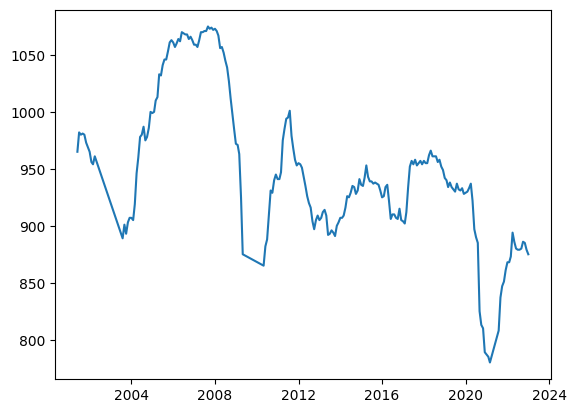

In [14]:
import matplotlib.pyplot as plt

na_series = pe_df.notna().sum(axis=1)

plt.plot(na_series)

In [10]:
pl.notna_plot(raw_pe.iloc[13:])

In [ ]:
raw_pe.apply(lambda s: s.value_counts().max(),axis=1).plot(figsize=(20,5))

In [ ]:
pe_df.loc[date(2009,1,1):date(2009,12,1)]

In [ ]:
mask.loc[date(2009,1,1):date(2009,12,1)]

In [ ]:
masked_raw_pe = af.apply_mask(raw_pe,mask)

In [ ]:
masked_raw_pe.notna().sum(axis=1).plot()
plt.hlines(600*0.8,masked_raw_pe.index.min(),masked_raw_pe.index.max(),colors='red')

In [ ]:
good_dfs = {}
bad_dfs = {}
filename = 'PE.csv'
filepath = data_dir_fp+'/'+filename
expected_stocks_per_date=600
min_total_dates_ratio=0.8
min_stocks_per_date_ratio=0.8

df = af.read_and_sort_data(filepath)

# If expected_stocks_per_date is not passed in as an argument, set it as the number of columns in df
if expected_stocks_per_date == 0:
    expected_stocks_per_date = df.shape[1]

# Apply mask to the data, if provided
masked_df = af.apply_mask(df,mask)

# Drop rows and columns with all NaN values
masked_df_1 = masked_df.dropna(axis=0,how='all').dropna(axis=1,how='all')

# Filter data based on the min_stocks_per_date_ratio and expected_stocks_per_date criteria
masked_df_2 = masked_df_1.loc[(masked_df_1.notna().sum(axis=1)/expected_stocks_per_date) > min_stocks_per_date_ratio]

# Calculate ratio of dates that meet the above criterion
maintained_dates_ratio = len(masked_df_2)/len(df)

# Categorize data into good or bad based on the min_total_dates_ratio criterion
if maintained_dates_ratio > min_total_dates_ratio:
    good_dfs[filename.split('.')[0]] = df.loc[masked_df_2.index]
else:
    bad_dfs[f"{filename.split('.')[0]}: {maintained_dates_ratio}"] = df.loc[masked_df_2.index]


In [ ]:
masked_df_1.notna().sum(axis=1)/expected_stocks_per_date

In [ ]:
masked_df_2.loc[date(2009,1,1):date(2009,12,1)]

In [ ]:
pl.notna_plot(pe_df)